In [1]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter

file_name = "data/210415_visible_spec_tests/visspec_testing_210415.h5"
h5_file = h5py.File(file_name, "r")

In [2]:
ses = 'session002/cal002'
inserts = list(h5_file[f'{ses}'].keys())
vis_waves = h5_file[ses].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file[ses].attrs['spec2_wavelengths_vector'][:]
                       

In [3]:
depth_min = -0.2
depth_max = 90.0

def normalize_depth(depth):
    return (depth - depth_min) / (depth_max - depth_min)

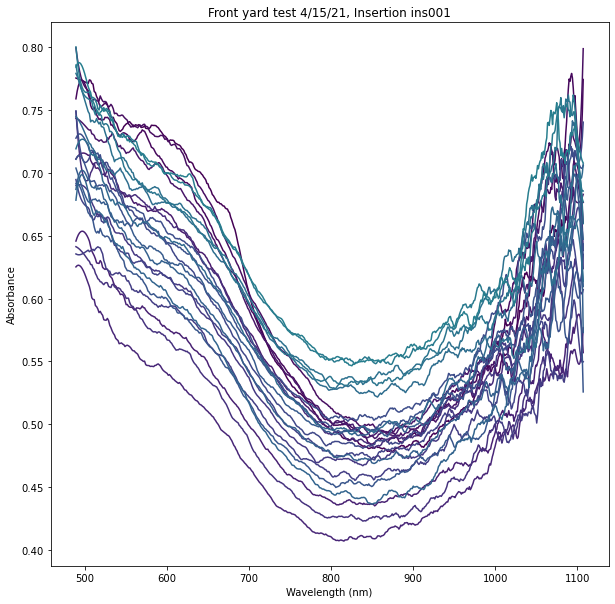

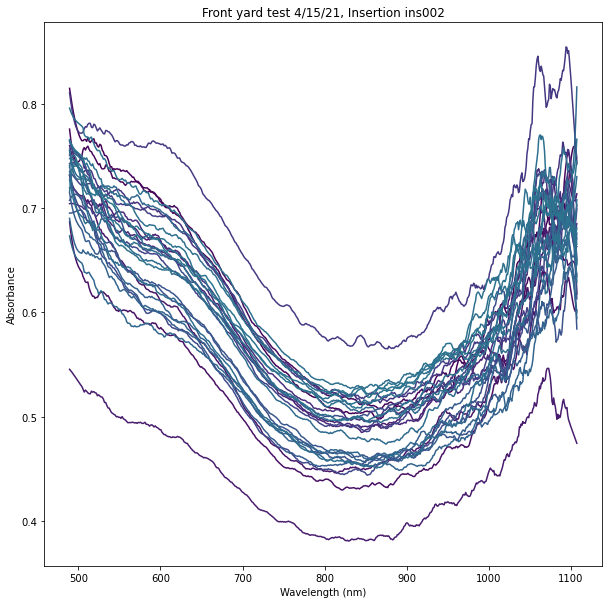

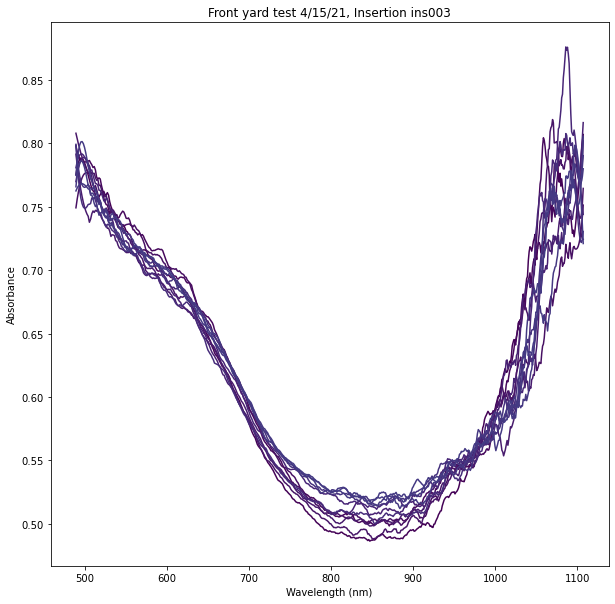

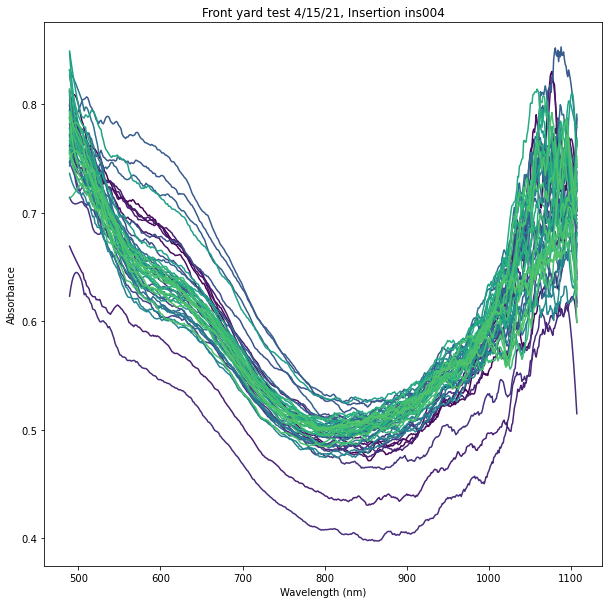

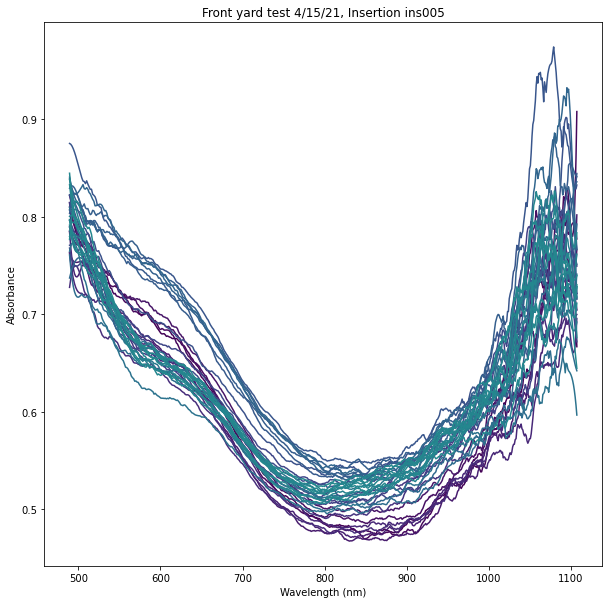

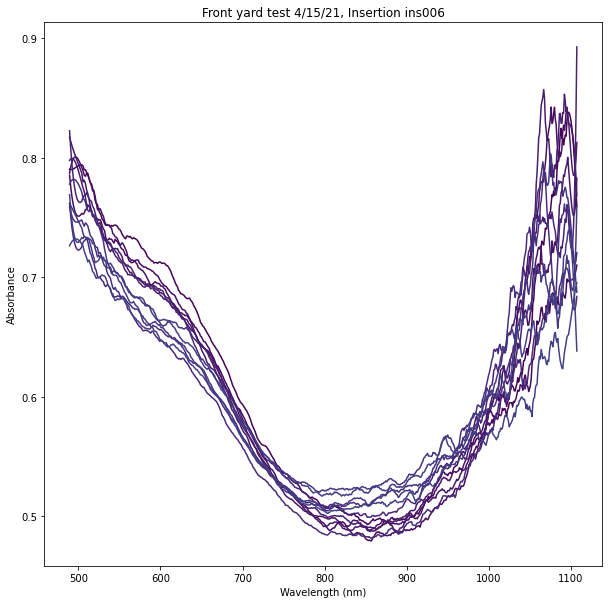

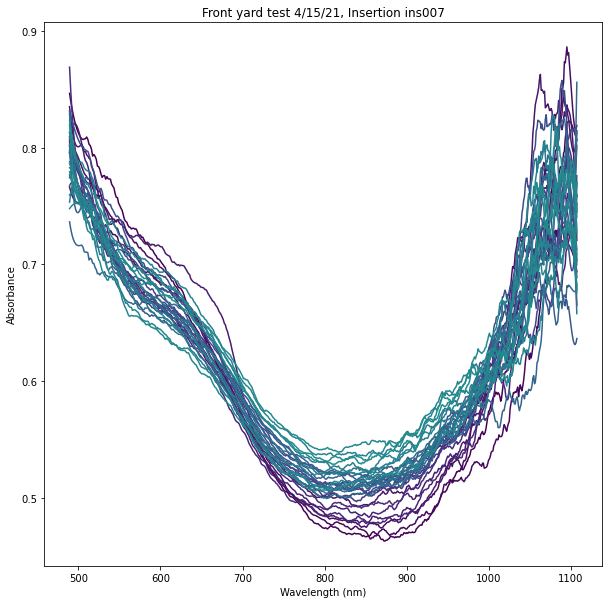

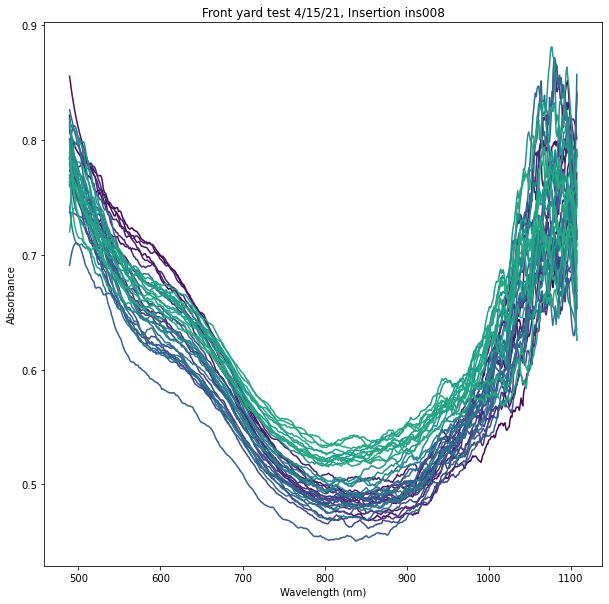

In [5]:
for insert in inserts:
    ins_abs_all = h5_file[f'{ses}/{insert}/derived/absorbance_depth'][:, :512]
    ins_depths = h5_file[f'{ses}/{insert}/derived/absorbance_depth'][:, -1]
    ins_abs = ins_abs_all[ins_depths > 6.0]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Front yard test 4/15/21, Insertion {insert}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        color = plt.cm.viridis(normalize_depth(ins_depths[i]))
        ax.plot(vis_waves, savgol_filter(ins_abs[i, :], 21, 3), color=color)
    plt.show()

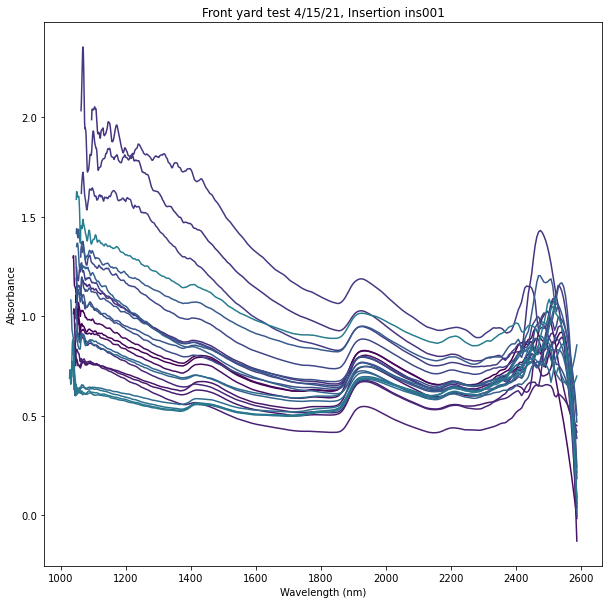

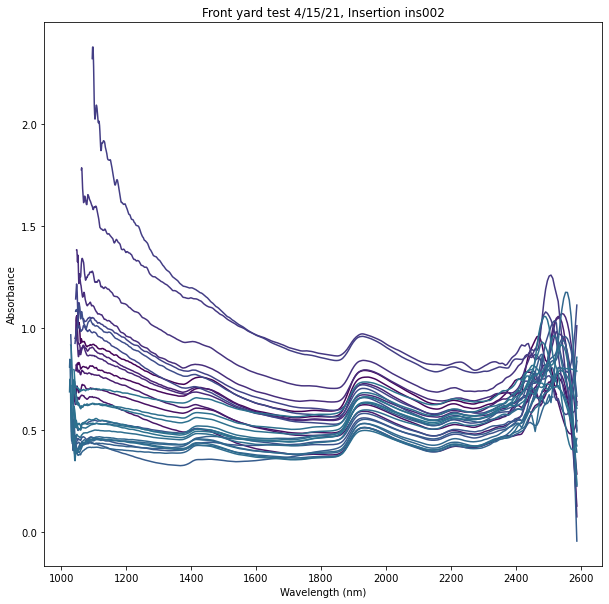

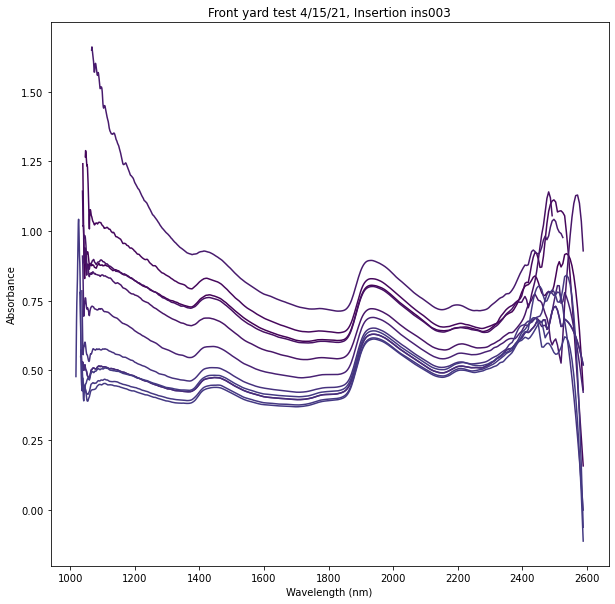

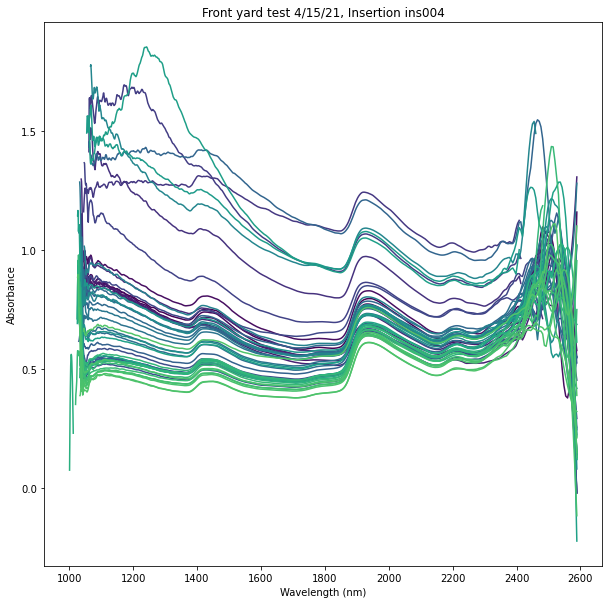

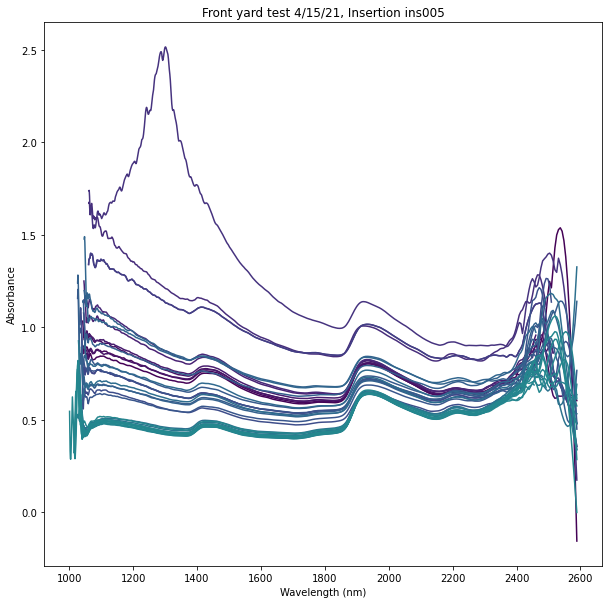

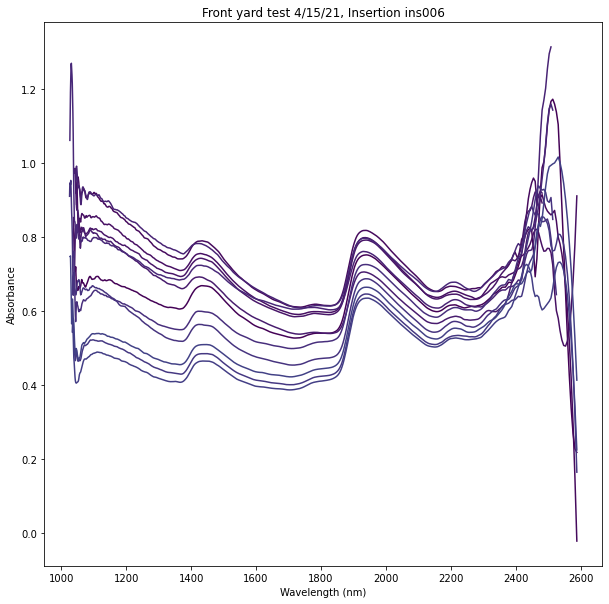

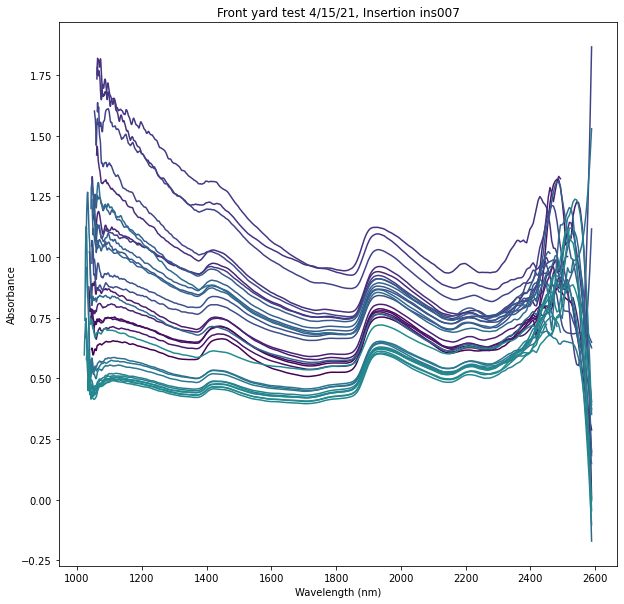

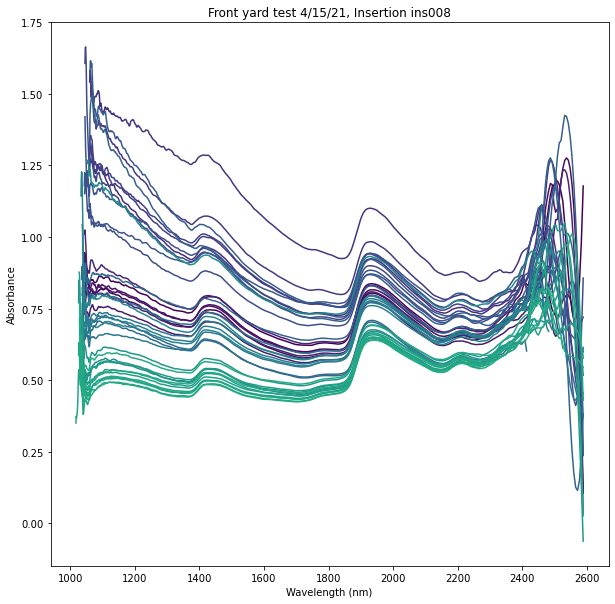

In [7]:
for insert in inserts:
    ins_abs_all = h5_file[f'{ses}/{insert}/derived/absorbance_depth'][:, 512:-2]
    ins_depths = h5_file[f'{ses}/{insert}/derived/absorbance_depth'][:, -1]
    ins_abs = ins_abs_all[ins_depths > 6.0]
    fix, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Front yard test 4/15/21, Insertion {insert}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        color = plt.cm.viridis(normalize_depth(ins_depths[i]))
        ax.plot(ftir_waves, savgol_filter(ins_abs[i, :], 21, 3), color=color)
    plt.show()

In [8]:
sessions = ['session001', 'session002', 'session003', 'session004']
calibrations = []
for session in sessions:
    cals = list(h5_file[session].keys())
    calibrations = calibrations + cals
print(calibrations)


['cal001', 'cal002', 'cal003', 'cal004', 'cal005', 'cal006', 'cal007', 'cal008', 'cal009', 'cal010', 'cal001', 'cal002', 'cal003', 'cal001', 'cal001', 'cal002', 'cal003']


In [9]:
def create_list_of_items_in_node(item_type, h5_file, node):
    keys = []
    if item_type == "group":
        my_type = h5py._hl.group.Group
    if item_type == "dataset":
        my_type = h5py._hl.dataset.Dataset
    h5_file[node].visit(lambda key: keys.append(key) if type(h5_file[node][key]) is my_type else None)
    return keys

def create_list_of_calibrations_in_node(h5_file, node):
    calibrations = []
    all_groups = create_list_of_items_in_node("group", h5_file, node)
    for group in all_groups:
        if group[-6:-3] == 'cal':
            calibrations.append(group)
    return calibrations

In [10]:
calibrations = create_list_of_calibrations_in_node(h5_file, "/")

In [11]:
calibrations

['session001/cal001',
 'session001/cal002',
 'session001/cal003',
 'session001/cal004',
 'session001/cal005',
 'session001/cal006',
 'session001/cal007',
 'session001/cal008',
 'session001/cal009',
 'session001/cal010',
 'session002/cal001',
 'session002/cal002',
 'session002/cal003',
 'session003/cal001',
 'session004/cal001',
 'session004/cal002',
 'session004/cal003']

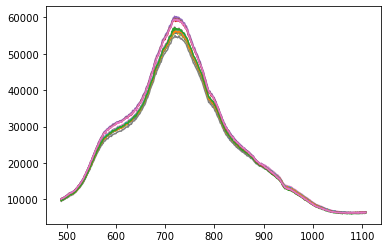

In [12]:
for calibration in calibrations:
    plt.plot(vis_waves, h5_file[calibration].attrs['white_spectrum'] )

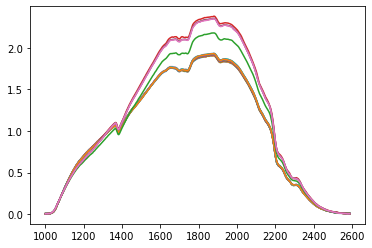

In [14]:
for calibration in calibrations:
    plt.plot(ftir_waves, h5_file[calibration].attrs['white_spectrum2'] )

In [16]:
for calibration in calibrations:
    print(h5_file[calibration].attrs['white_spectrum'].max(), h5_file[calibration].attrs['white_spectrum2'].max())

56306.75 1.904447704624097
56140.5 1.907257811750413
56742.5 1.9125583242823232
56421.0 1.9157079034365647
56705.0 1.9175459272546223
56773.25 1.9269859699085619
57432.75 1.9335956939878431
55024.0 1.9257939464797877
56080.25 1.9320794251724447
56885.25 1.9313683699286106
56290.25 1.9285969655850483
56323.0 1.9283351960031463
57209.0 2.1786130257659746
59492.0 2.3791302688405067
60340.5 2.352749271864392
59783.0 2.353081434204537
59541.5 2.3476162572887533


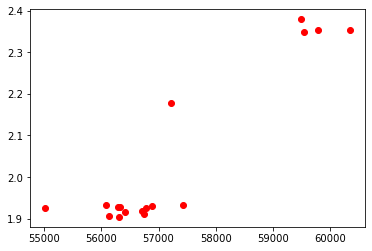

In [18]:
for calibration in calibrations:
    plt.plot(h5_file[calibration].attrs['white_spectrum'].max(), h5_file[calibration].attrs['white_spectrum2'].max(), "ro")

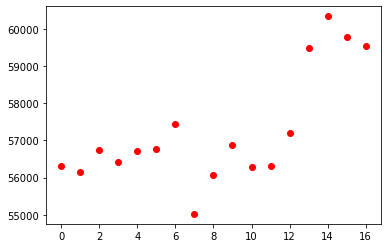

In [20]:
for i in range(len(calibrations)):
    plt.plot(i, h5_file[calibrations[i]].attrs['white_spectrum'].max(), "ro")

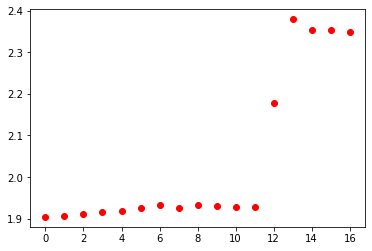

In [21]:
for i in range(len(calibrations)):
    plt.plot(i, h5_file[calibrations[i]].attrs['white_spectrum2'].max(), "ro")

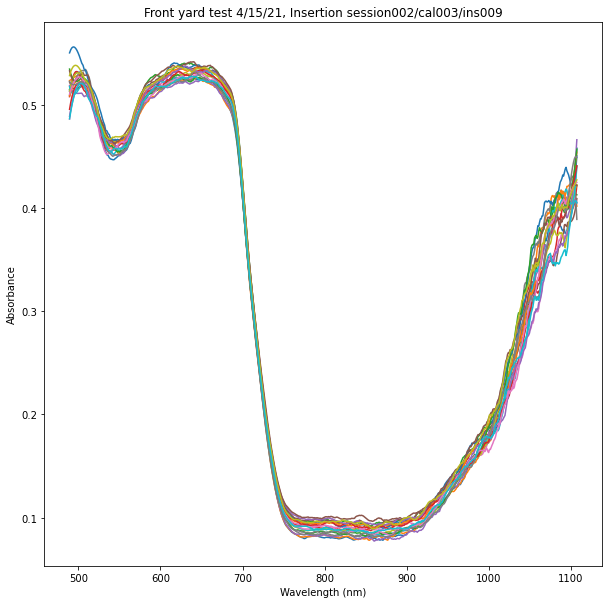

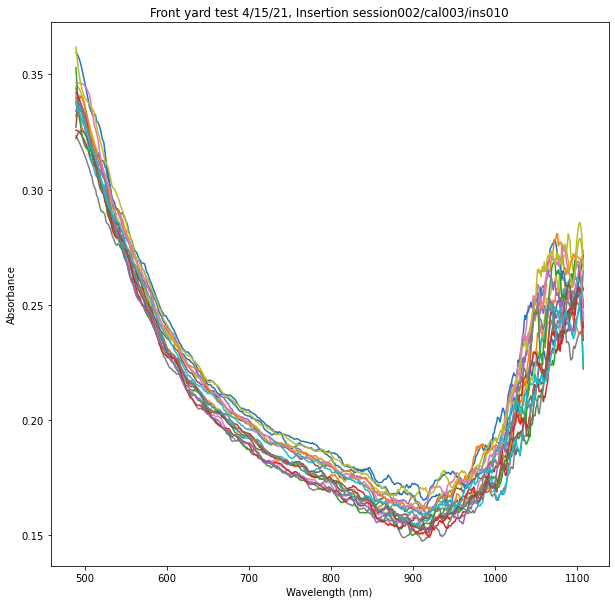

In [24]:
inserts = ['session002/cal003/ins009', 'session002/cal003/ins010']
for insert in inserts:
    ins_abs = h5_file[f'{insert}/spectrometer1/derived/absorbances'][:]    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Front yard test 4/15/21, Insertion {insert}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    for i in range (ins_abs.shape[0]):
        
        ax.plot(vis_waves, savgol_filter(ins_abs[i, :], 21, 3))
    plt.show()


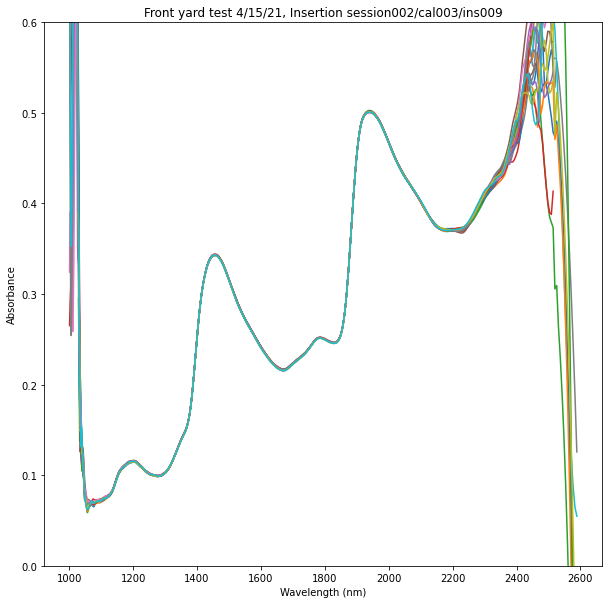

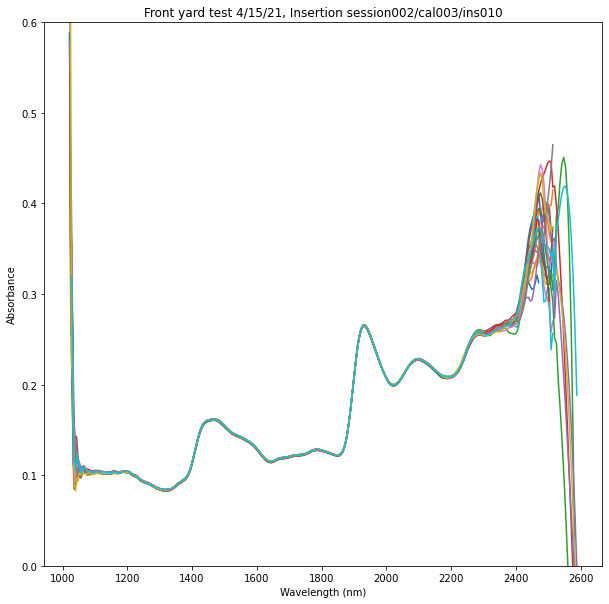

In [28]:
inserts = ['session002/cal003/ins009', 'session002/cal003/ins010']
for insert in inserts:
    ins_abs = h5_file[f'{insert}/spectrometer2/derived/absorbances'][:]    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Front yard test 4/15/21, Insertion {insert}")
    ax.set_ylabel("Absorbance")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylim(0.0, 0.6)
    for i in range (ins_abs.shape[0]):
        
        ax.plot(ftir_waves, savgol_filter(ins_abs[i, :], 21, 3))
    plt.show()